### The purpose of this notebook is to get comfortable with an end to end ml project

- Look at the big picture
- get the data
- discover and visualize your data to gain insights
- prepare data for ml algorithms
- select a model and train it
- fine tune your model
- present your solution
- launch, monitor and maintain your system



### Working with real data
- kaggle datasets: https://www.kaggle.com/datasets
- amazon's aws datasets: http://aws.amazon.com/fr/datasets/
- meta portals: 
    - http://quandl.com
    - http://dataportals.org
    - http://opendatamonitor.eu/
- quora.com: http://goo.gl/zDR78y



## Lets get the california housing prices dataset

In [1]:
import os
import tarfile
from six.moves import urllib



In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
# fetch_housing_data()
housing = load_housing_data()


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

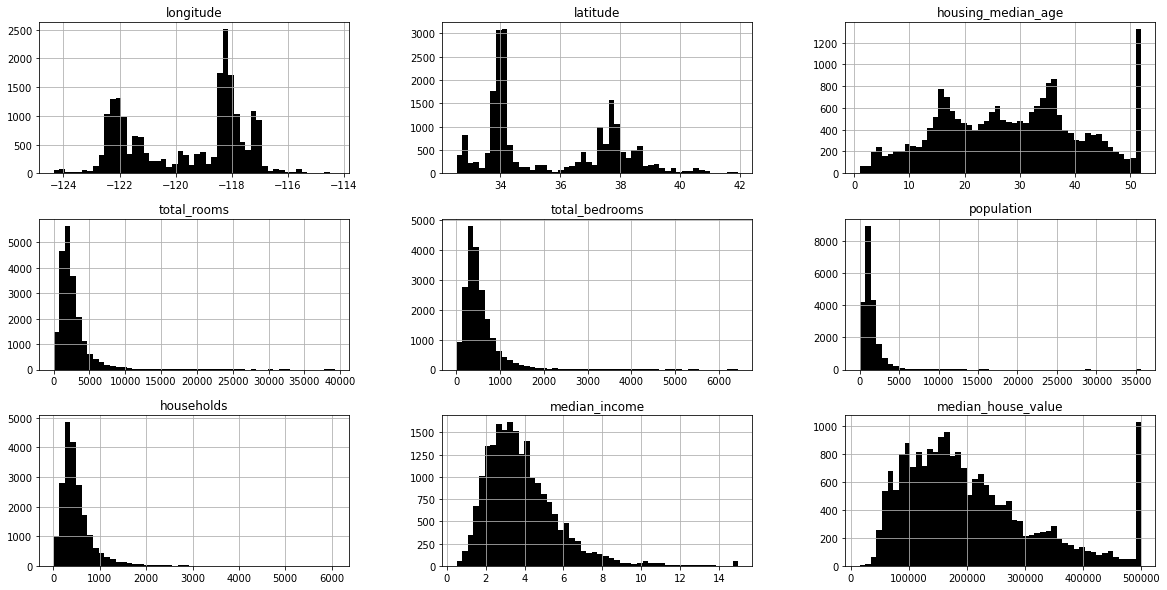

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 10), color='black');

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Standard way to split data into train and test set

In [11]:
# split the data into train and test set
import numpy as np
def split_domain_into_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# now we can split housing into train and test set as follows:
train_set, test_set = split_domain_into_train_test(housing, 0.2)


In [13]:
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


### above method of splitting data is not effective.  Better to use sklearns train-test-split function

- stratify= 'y' is for imbalanced datasets.  When you split, you want to make sure the class is evenly balanced out

In [14]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20634,20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


## Lets get the wine dataset
- wine dataset has 178 wine samples and 13 features describing their different chemical properties

In [20]:
from sklearn.datasets import load_wine
data = load_wine()


In [21]:
data.target # three response labels
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
df = pd.DataFrame(data.data, columns=data.feature_names)

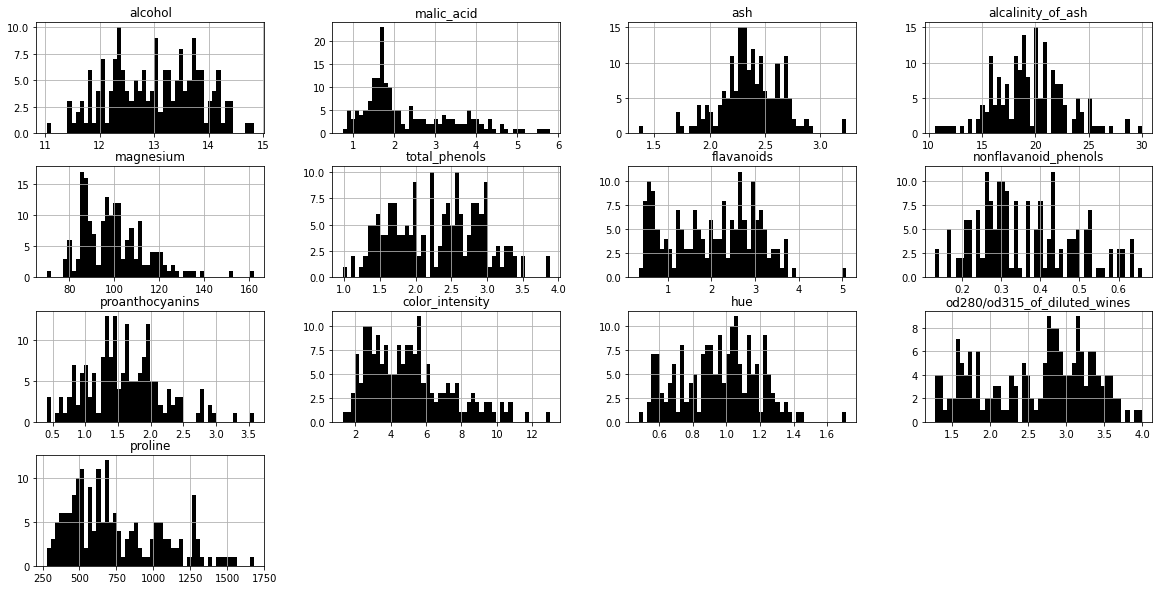

In [23]:
df.hist(bins=50, figsize=(20, 10), color='black');

In [24]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [26]:
X, y = df.values, data.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=0,
    stratify=y)


In [27]:
# lets do some feature scaling as they aren't on the same scale
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# fit a model only once on training data and use the fitted parameters on test data
mms = MinMaxScaler()
X_train_norm_wine = mms.fit_transform(X_train_wine)
X_test_norm_wine = mms.transform(X_test_wine)


# Selecting meaningful features
- if a model performs better on training set rather than test set, its because overfitting has occured
- overfitting is when model has high variance.  The model is too complex and its learned the patterns
in the training set by chance.  
- Common solutions to reduce overfitting are follows: 
  - collect more data
  - introduce a penalty for complexity via regularization
  - chooser a simpler model with fewer parameters
  - reduce the dimension of the dataset

- Getting more data is usually not helpful.  One can use approaches like validation curve to check if more training data is indeed needed
- Feature selection allows one to reduce the dimensionality of the dataset- which leads to simpler models by requiring fewer parameters to be fitted to data
- regularization is a form of feature selection

### L1 and L2 regularization as penalties against model complexity
- if a model is too complex, introduce a penalty $\lambda$ for complexity
- one way to reduce model complexity is by penalizing large individual weights via L2 norm $\|w\|_2^2$ or L1 norm $\|w\|_1$
- L1 norm leads to sparse vectors where all the weights are 0, very useful for feature selection if there are many features.
- Hence, L1 norm is usually used for feature selection

## Goal of ML
- recall that goal of ML is to find a function $h_\theta(x^i)$ such that $h_\theta(x^i) = y^i$ $\ \ \forall x^i \in \bold{D}$
- Since We can't know the true $h_\theta(x^i)$, we approximate this by $\widehat{h}_\theta(x^i)$.  Initially, we don't know the parameters of this approximated model, 
hence we need to reduce the errors made from this model and the true observations.  One way of doing this is to use the cost function: 

$J(w) = \frac{1}{2} \sum{(y^i - h_{w}(x^i))}$

Regularization occurs when we seek to reduce instead: 


$J(w) = \frac{1}{2} \sum{(y^i - h_{w}(x^i))} + \lambda \|w\|_1$

- Adding the penalty parameter encourages smaller weights.  
- Without penalty, this is the same old problem of reducing the weights which is solely dependent on training data and cause overfitting if poor model is chosen or if there is not enough data
- By adding the penalty, we penalize large weights. We cause the model to become less dependent on training data 
- L1 is like a box.  L2 is a circle.  L1 forces the weights to go towards 0.  Where L2, its a ball.  If lambda is sufficiently large, i.e going to infinity, weights go to 0.  

In [29]:
from sklearn.linear_model import LogisticRegression
# notice the overfitting int he model below
lr = LogisticRegression(penalty='l2', C=1.0)
lr.fit(X_train_norm_wine, y_train_wine)
print(f"Training Accuracy: {lr.score(X_train_norm_wine, y_train_wine)}")
print(f"Test accuracy: {lr.score(X_test_norm_wine, y_test_wine)}")
print(f"intercept {lr.intercept_}")

Training Accuracy: 0.9838709677419355
Test accuracy: 1.0
intercept [-2.8686083   2.09852227  0.77008603]


- Both the training and test accuracy is close to 100%. 
- the three intercept values occurs because skikit by default uses one vs rest approach by multi classification
- OvR is where it fits class 1 vs class 2 and 3, class 2 vs class 1 and 3, and finally class 3 vs class 1 and 2
- lets check the coefficient of the fitted model for the OvR approach:
  - since there are 13 features, we have 39 parameters (13 * 3 fits)
  - since the weights are not 0, enforce sparcity by decreasing the C parameter, $\lambda = 1/C$

In [30]:
lr.coef_

array([[ 1.53050659, -0.05053373,  0.58580484, -1.04069955,  0.40335269,
         0.83288025,  1.19171639, -0.48736649,  0.40697948,  0.30402404,
         0.51713917,  0.99977196,  1.98478632],
       [-1.90789582, -0.70627221, -0.95390514,  0.67279804, -0.60044545,
         0.04100893,  0.2960042 , -0.1257044 ,  0.23433605, -1.54830095,
         0.85266082,  0.67421578, -1.8434463 ],
       [ 0.37738923,  0.75680594,  0.3681003 ,  0.36790151,  0.19709277,
        -0.87388918, -1.48772058,  0.61307089, -0.64131553,  1.24427692,
        -1.36979999, -1.67398775, -0.14134002]])

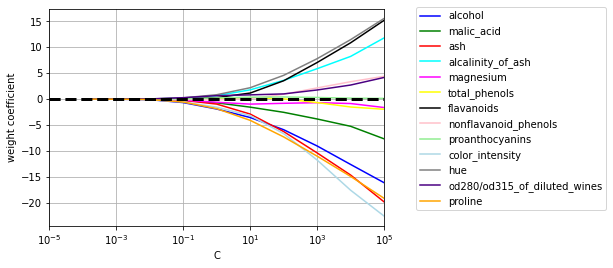

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6):
    lr = LogisticRegression(penalty='l2',C=10.**c,random_state=0)
    lr.fit(X_train_norm_wine, y_train_wine)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df.columns[column],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.grid();

## Sequential Feature Selection Algorithms
- Alternative way to reduce complexity of a model and avoid overfitting is dimensionality reduction via feature selection and feature extraction
- feature selection means we select a subset some original feature space
- feature extraction is where we compress the data into a lower dimension subspace to construct a new feature space, like. using pca
- Sequential feature selection is a greedy search method that reduces d-dimensional feature space into k dimensional feature subspace, $k \lt d$
- This subset selection method is useful when there are too many features
- very helpul for models where you are unable to regularize

### Sequential Backward Selection (SBS) Algorithm
1) Initialize algorithm with $k=d$, where d is the dimensionality of the full feature space $X_D$
2) Determine the feature $x^-$ that maximizes the criterion: $x^- = argmax J(X_k - x)$, where $ x \in X_D$
    - what the above says is that we need to find the feature that causes the least performance loss after removal
3) Remove feature $x^-$ from the feature set: $X_{k-1} = X_k - x^-$
4) Iterate to next feature $k \leftarrow k - 1$
5) terminate if k equals the number of desired features; otherwise go to step 2

In [51]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS:
    def __init__(self, classifier, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.classifier = clone(classifier)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)

        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.classifier.fit(X_train[:, indices], y_train)
        y_pred = self.classifier.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# inside sbs, i am using train-test split function. 
# passing training set here means i am splitting train set into train and validation set
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_norm_wine, y_train_wine)

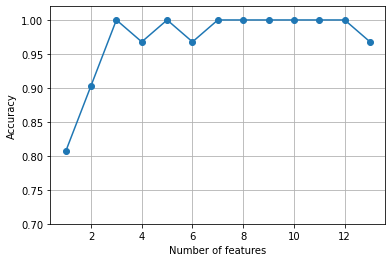

In [53]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()


### Observation
- We increased the accuracy of the model by reducing the number of features
- model achieved 100% accuracy using 3 features and 5, 7-12.  What rae the labels of the 3 features?

In [63]:
k3 = list(sbs.subsets_[10])
print(df.columns[k3])

Index(['alcohol', 'malic_acid', 'od280/od315_of_diluted_wines'], dtype='object')


- Accuracy using knn classiefier on training set $D_{TR}$ and test set $D_{TE}$ using full feature set
- Accuracy using knn Classifier on $D_{TR}$ and $D_{TE}$ using just 3 features

In [62]:
knn.fit(X_train_norm_wine, y_train_wine)
print(f"Training Accuracy: {knn.score(X_train_norm_wine, y_train_wine)}")
print(f"Test Accuracy: {knn.score(X_test_norm_wine, y_test_wine)}")

Training Accuracy: 0.967741935483871
Test Accuracy: 0.9629629629629629


In [64]:
knn.fit(X_train_norm_wine[:, k3], y_train_wine)
print(f"Training Accuracy: {knn.score(X_train_norm_wine[:, k3], y_train_wine)}")
print(f"Test Accuracy: {knn.score(X_test_norm_wine[:, k3], y_test_wine)}")

Training Accuracy: 0.9516129032258065
Test Accuracy: 0.9259259259259259


### Observation
- Using less than quarter of feature set, prediction accuracy on test set declined slightly. 
- This may indicate that those 3 features are not enough.  We might need more
- simpler models are easier to interpret.  Make it simple, as its easy to interpret.  

## Assessing feature importance via random forests
- random forests allows us to measure feature importance as averaged impurity decrease computed from all decision trees in the forest
- makes no assumptions about linear separability of data
- in sklearn we can get feature_importances after fitting a random forest
- lets fit 500 trees on the wine dataset and rank the 13 features by their respective importances
- remember no need to standardize or normalize the features

In [87]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_norm_wine, y_train_wine)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]


 1) proline                        0.185453
 2) flavanoids                     0.174751
 3) color_intensity                0.143920
 4) od280/od315_of_diluted_wines   0.136162
 5) alcohol                        0.118529
 6) hue                            0.058739
 7) total_phenols                  0.050872
 8) magnesium                      0.031357
 9) malic_acid                     0.025648
10) proanthocyanins                0.025570
11) alcalinity_of_ash              0.022366
12) nonflavanoid_phenols           0.013354
13) ash                            0.013279


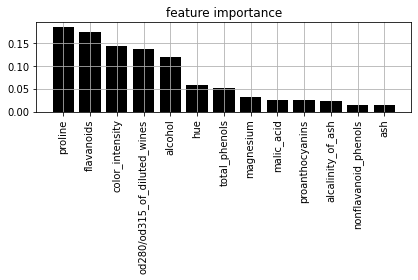

In [88]:
for f in range(X_train_norm_wine.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,feat_labels[indices[f]], importances[indices[f]]))
plt.title("feature importance")
plt.bar(range(X_train_norm_wine.shape[1]), importances[indices], align='center', color='black')
plt.xticks(range(X_train_norm_wine.shape[1]),
feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_norm_wine.shape[1]])
plt.tight_layout()
plt.grid()

### Observation
- feature importances are normalized so tht they sum up to 1
- proline, flavanoids, color_intensity, 0d of diluted wine, alcohol are the most important features
- recall when we did the SBS algorithm, it included 2 of the above; we found 0d of diluted wine and alcohol as the most important features as well
- if interpretability is a concern; if two or mroe features are highly correlated, one feature may be ranked highly w hile the information of the other feature may not be fully captured
- if prediction is the concern, then above method is fine.  If interpretability, then no
- randomforestclassifier can be used as a feature selector in a pipeline project
- sklearn has a tool called selectfrommodel that selects features based on user specified threshold after model fitting
- set the threshold to 0.1 to select 5 most important features

In [90]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train_norm_wine)
print("NUmber of samples that meeet this criteria: ", X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

NUmber of samples that meeet this criteria:  124
 1) proline                        0.185453
 2) flavanoids                     0.174751
 3) color_intensity                0.143920
 4) od280/od315_of_diluted_wines   0.136162
 5) alcohol                        0.118529


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')